# Lab 2: Data Manipulation and Web Services

# Challenge No 1:

In this challenge, we create a dataframe with 1OO rows and 4 columns using a dictionary. Next, manipulate the resulting dataframe in following ways:

- create a new dataframe by filtering the first 30 rows and first 3 columns, we save this new dataframe as subset_df,
- filter rows of the original dataframe by a numerical attribute and a categorical attribute and save the resulting dataframe as filtered_df,
- calculate basic summary statitics using methods mean() and std(), and use groupby()

In [20]:
import numpy as np
import pandas as pd

# Create a dataframe: initialize columns
years1 = range (1924,2024)
a = np.repeat(years1, 1)
b = np.random.randint(0, 1000, 100)
c = np.random.randint(0, 3, 100)
d = np.random.randint(0, 10, 100)

# Combine the columns into a dataframe using a dictionary
df = pd.DataFrame({'a':a,'b':b,'c':c,'d':d})
df.head

<bound method NDFrame.head of        a    b  c  d
0   1924  870  0  2
1   1925  893  2  2
2   1926  615  1  4
3   1927  476  1  4
4   1928  604  2  2
..   ...  ... .. ..
95  2019  424  2  3
96  2020  855  1  1
97  2021  903  2  5
98  2022  597  0  1
99  2023  989  0  3

[100 rows x 4 columns]>

In [8]:
# Subset first 30 rows and 3 columns of the original dataframe
subset_df = df.iloc[:30, :3]

In [34]:
# Covert column c into a categorical variable
df['c'] = df['c'].astype('category')
df.dtypes

a       int64
b       int64
c    category
d       int64
dtype: object

In [36]:
# Filter original dataframe by a numerical and categorical attribute
filtered_df = df[df.iloc[:,1] >= 5]
filtered_df = filtered_df[filtered_df.iloc[:,2] == 2]
filtered_df.head()

a    b  c  d
1  1925  893  2  2
4  1928  604  2  2
6  1930  448  2  7
8  1932  935  2  7
9  1933  164  2  3

In [40]:
# Calculate summary statistics of numerical columns
df[['a', 'b', 'd']].mean()
df[['a', 'b', 'd']].sum()
df[['a', 'b', 'd']].std()

# Use the method groupby
grouped_df = df.groupby('c')

/var/folders/_v/0ysnzh811hj_hnrpjkv8j6fw0000gn/T/ipykernel_54096/594596572.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('c')


## Challenge 2

### 2.1 Part 1

In the first part of Challenge 2, we calculate the clustered areas for end locations of rented bicycles. To do so, we follow a similar workflow as in the provided notebook. 

The workflow can be summarized in following steps:
1. Obtain the data
   - we use the Glasgow Open Data API to obtain the data,
   - transform the data into json format such that it is then convertible into a pandas dataframe.
     
2. Clean the data
   - check and drop missing values in columns containing coordinates,
   - using location data on end locations convert into a Geopandas dataframe,
   - check and change the coordinate system,
   - change for relevant columns and change datatypes if necessary
     
3. Perform clustering
   - perform clustering using the scikitlearn library,
   - visualize it.
     

### 2.1.1 Obtain the data using web services

In [42]:
import requests
import pandas as pd
import geopandas as gpd

# Use the URL obtained from Glasgow Open Data API
url_bikes = "https://api.glasgow.gov.uk/mobility/v1/get_rentals?startDate=2022-05-01&endDate=2023-05-01"

response = requests.get(url_bikes)
response

<Response [200]>

In [43]:
# Translate the web server response into json format
data = response.json()

In [44]:
# Extract data
rental_data = data['data']

In [45]:
# Convert into a Pandas dataframe
rental_pd = pd.DataFrame(rental_data)
rental_pd.head()

created                   updated cityId  bikeId  \
0  2022-10-21T13:09:57.926Z  2022-10-21T13:09:57.926Z    237  116870   
1  2022-10-21T13:09:57.975Z  2022-10-21T13:09:57.975Z    237  143384   
2  2022-10-21T13:09:58.026Z  2022-10-21T13:09:58.026Z    237  129744   
3  2022-10-21T13:09:58.076Z  2022-10-21T13:09:58.076Z    237  143168   
4  2022-10-21T13:09:58.126Z  2022-10-21T13:09:58.126Z    237  143248   

              startDate startPlaceId startPlaceCityId  \
0  2022-05-01T00:01:40Z       264299              237   
1  2022-05-01T00:04:17Z     28521547              237   
2  2022-05-01T00:04:24Z       266171              237   
3  2022-05-01T00:04:29Z       349455              237   
4  2022-05-01T00:04:40Z       349455              237   

                            startPlaceName  startPlaceStationNumber  \
0                    ELECTRIC - Broomielaw                   8413.0   
1                        King Street South                   8230.0   
2  University of Glasgow (East) - ELECTRIC                   8435.0   
3       ELECTRIC - Cessnock Subway Station                   8444.0   
4       ELECTRIC - Cessnock Subway Station                   8444.0   

   startPlaceLat  ...  endPlaceCityId endChannelId  \
0      55.856600  ...             237          381   
1      55.855860  ...             237          381   
2      55.871763  ...             237          381   
3      55.851918  ...             237          381   
4      55.851918  ...             237          381   

                                        endPlaceName endPlaceStationNumber  \
0                              ELECTRIC - Broomielaw                8413.0   
1  Alexandra Park (south entrance) Alexandra Para...                8457.0   
2                         Botanic Gardens - ELECTRIC                8417.0   
3                 ELECTRIC - Cessnock Subway Station                8444.0   
4                         ELECTRIC - St Enoch Square                8410.0   

  endPlaceLat endPlaceLong durationSeconds  isInvalid  price  isEbike  
0   55.856600    -4.263521              56      False    2.0     True  
1   55.863128    -4.210282            1097      False    1.0    False  
2   55.878278    -4.288487             344      False    1.0    False  
3   55.851918    -4.294490           10400      False    6.0    False  
4   55.856829    -4.255292            4611      False    3.0    False  

[5 rows x 24 columns]

### 2.1.2 Clean the data

In [46]:
# Drop observations with missing data on location 
clean_rental_pd = rental_pd.dropna(subset=['startPlaceLat', 'startPlaceLong', 'endPlaceLat','endPlaceLong'])
clean_rental_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9940 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created                  9940 non-null   object 
 1   updated                  9940 non-null   object 
 2   cityId                   9940 non-null   object 
 3   bikeId                   9940 non-null   object 
 4   startDate                9940 non-null   object 
 5   startPlaceId             9940 non-null   object 
 6   startPlaceCityId         9940 non-null   object 
 7   startPlaceName           9940 non-null   object 
 8   startPlaceStationNumber  9555 non-null   float64
 9   startPlaceLat            9940 non-null   float64
 10  startPlaceLong           9940 non-null   float64
 11  startChannelId           0 non-null      object 
 12  endDate                  9940 non-null   object 
 13  endPlaceId               9940 non-null   object 
 14  endPlaceCityId           9940

In [48]:
# Check for missing values in coordinates for end locations
nan_in_column_Lat = rental_pd['endPlaceLat'].isna().sum()
nan_in_column_Long = rental_pd['endPlaceLong'].isna().sum()

# Print number of missing values
print(nan_in_column_Lat, nan_in_column_Long)

# Remove missing values
clean_rental_pd = rental_pd.dropna(subset=['endPlaceLat','endPlaceLong'])

True True


In [47]:
# Convert into Geopandas dataframe (using end locations)
gdf_bikes_end = gpd.GeoDataFrame(clean_rental_pd, geometry=gpd.points_from_xy(clean_rental_pd['endPlaceLong'], clean_rental_pd['endPlaceLat']))

In [ ]:
# Set the dataframe crs to EPSG:4326 
gdf_bikes_end = gdf_bikes_end.set_crs("EPSG:4326")

# Explore the data
gdf_bikes_end.explore()

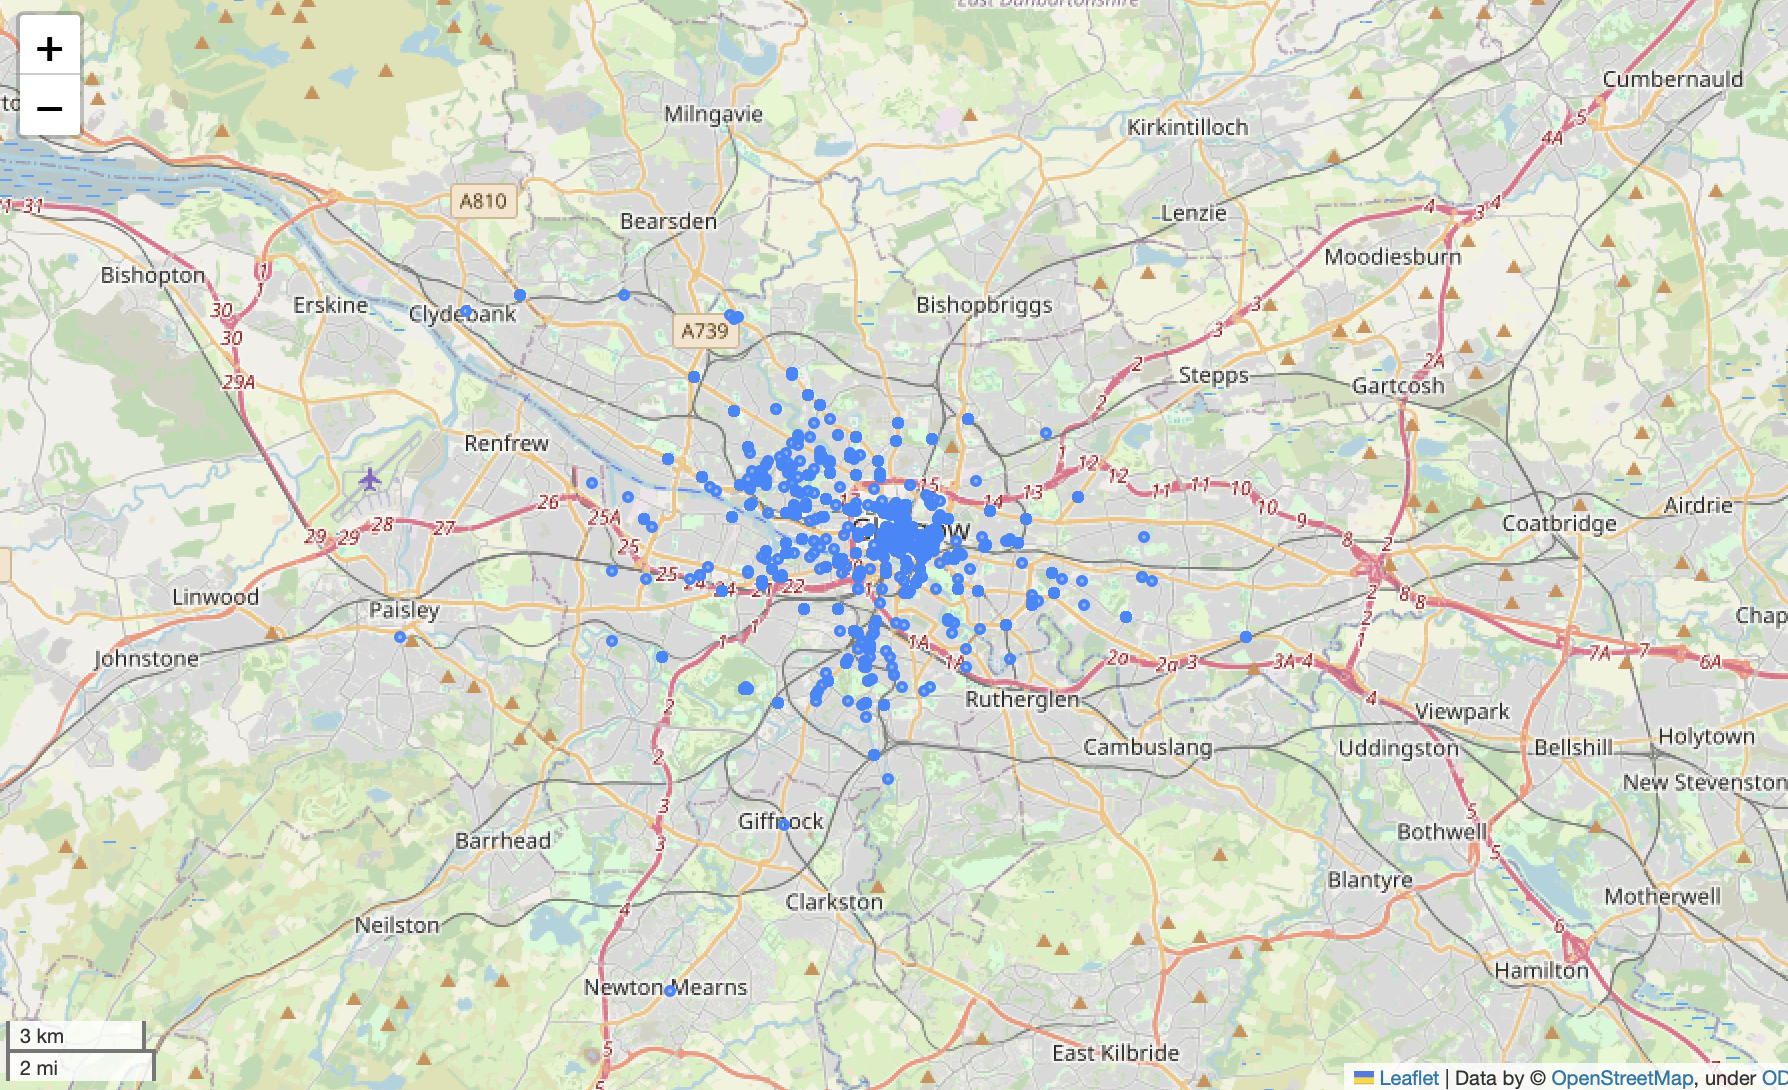

In [ ]:
# Keeping only relevant columns
keep_cols_end = [
    "endDate",
    "endPlaceId",
    "endPlaceName",
    "durationSeconds",
    "isInvalid",
    "price",
    "isEbike",
    "endPlaceLat",
    "endPlaceLong",
    "geometry",
]

gdf_bikes_end = gdf_bikes_end[keep_cols_end]
gdf_bikes_end.head()

In [14]:
# Change data types when necessary
gdf_bikes_end.endPlaceId = gdf_bikes_end.endPlaceId.astype(int)
gdf_bikes_end.endPlaceName = gdf_bikes_end.endPlaceName.astype(str)
gdf_bikes_end['endDate'] = pd.to_datetime(gdf_bikes_end['endDate'], format='%Y-%m-%dT%H:%M:%SZ')

### 2.1.3 Perform clustering

In [17]:
from sklearn.cluster import KMeans

# Set number of clusters
num_clusters = 4

# Perform clustering
kmeans_collection = KMeans(n_clusters=num_clusters, random_state=42)
gdf_bikes_end['kmeans_cluster'] = kmeans_collection.fit_predict(gdf_bikes_end[['endPlaceLong', 'endPlaceLat']])

In [18]:
# Visualize it in a leafmap
import leafmap

m = leafmap.Map(center=(55.860166, -4.257505),
                zoom=12,
                draw_control=False,
                measure_control=False,
                fullscreen_control=False,
                attribution_control=True,
                   
               )

m.add_basemap("CartoDB.Positron")
m.add_data(
    gdf_bikes_end,
    column='kmeans_cluster',
    legend_title='Clusters',
    cmap='Set1',
    k=4,
)

#Ploting the map
m

Map(center=[55.860166, -4.257505], controls=(AttributionControl(options=['position', 'prefix'], position='bott…

### 2.2 Part 2

The following code calculates and visualizes the number of traffic sensors per working zone in Glasgow. We obtain the data on traffic sensor location from the Glasglow Open Data API ( Transit) https://developer.glasgow.gov.uk/api-details#api=traffic&operation=traffic-sensor.

To calculate the number of sensors per working zone and visualize it, we follow the following workflow:

1. Obtain and clean data on traffic sensors
   - use Open Glasgow Data API to get url for the dataset,
   - load the dataset and convert it into first json format and then pandas dataframe,
   - clean the dataset: check missing values, change datatypes,
   - convert into a Geopandas dataframe.

2. Load Working zones data
   - load working zones data as geopandas dataframe

3. Join the datasets and calculate number of sensors per zone
   - change coordinate system of both datasets so that geometries match,
   - perform a spatial join: we need sensors (points) in polygons (working zones),
   - calculate the number of sensors per working zones using groupby()

4. Visualize the result
   - merge calculated number of sensors with geodataframe for working zones,
   - use this newly created data to visualize number of sensors per working zone in chloropleth maps.


In [1]:
import requests
import pandas as pd
import geopandas as gp

# Get the URL from Glasgow Open Data API
traffic_sensor = "https://api.glasgow.gov.uk/traffic/v1/movement/sites?Lon=longitude&Lat=latitude"

# Check if data has been fetched successfully 
responses = requests.get(traffic_sensor)
responses

<Response [200]>

In [ ]:
# Convert data into json format and check its structure
data = responses.json()

In [3]:
# Since it is not flat we use a list comprehension to transform it
sensors_flat = [{
    'siteId': entry['siteId'],
    'from_description': entry['from']['description'],
    'from_lat': entry['from']['lat'],
    'from_long': entry['from']['long'],
    'to_description': entry['to']['description'],
    'to_lat': entry['to']['lat'],
    'to_long': entry['to']['long']
} for entry in data]

# Convert the flat json dataset into a dataframe
sensors_df = pd.DataFrame(sensors_flat)

In [4]:
# Check datatypes
sensors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   siteId            1275 non-null   object
 1   from_description  1275 non-null   object
 2   from_lat          1275 non-null   object
 3   from_long         1275 non-null   object
 4   to_description    1275 non-null   object
 5   to_lat            1275 non-null   object
 6   to_long           1275 non-null   object
dtypes: object(7)
memory usage: 69.9+ KB


In [5]:
# Change datatypes of columns with coordinates into float
sensors_df['from_lat'] =  sensors_df['from_lat'].astype(float)
sensors_df['from_long'] =  sensors_df['from_long'].astype(float)
sensors_df['to_lat'] =  sensors_df['to_lat'].astype(float)
sensors_df['to_long'] =  sensors_df['to_long'].astype(float)

In [6]:
# Check for number of missing values for columns with coordinates
nan_in_column_fLat = sensors_df['from_lat'].isna().sum()
nan_in_column_fLong = sensors_df['from_long'].isna().sum()
nan_in_column_tLat = sensors_df['to_lat'].isna().sum()
nan_in_column_tLong = sensors_df['to_long'].isna().sum()

print(nan_in_column_fLat, nan_in_column_fLong, nan_in_column_tLat, nan_in_column_tLong)

0 0 0 0


In [7]:
import geopandas as gpd

# Convert into a Geopandas dataframe setting columns with coordinates as geometry
sensors_from = gpd.GeoDataFrame(sensors_df,
                                geometry=gpd.points_from_xy(
                                    sensors_df['from_long'],
                                    sensors_df['from_lat']))
sensors_to = gpd.GeoDataFrame(sensors_df,
                                geometry=gpd.points_from_xy(
                                    sensors_df['to_long'],
                                    sensors_df['to_lat']))

# Keep relevant columns
sensors_from = sensors_from[['siteId','geometry']]
sensors_to = sensors_to[['siteId','geometry']]

# Check datatypes
sensors_from.dtypes
sensors_to.dtypes

siteId        object
geometry    geometry
dtype: object

In [10]:
# Load data for working zones
workingzones = gpd.read_file("Lab2_Data/WorkplaceZones2011Scotland.shp")
workingzones.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [11]:
# Change coordinate systems of both datasets so that they match
sensors_from = sensors_from.set_crs("EPSG:4326")
sensors_to = sensors_from.set_crs("EPSG:4326")
workingzones1 = workingzones.to_crs("EPSG:4326")

In [ ]:
# Filter working zones in Glasgow based on its LA code
workingzones_glasgow = workingzones1[workingzones1['LADCD'] == 'S12000046']
workingzones_glasgow.explore()

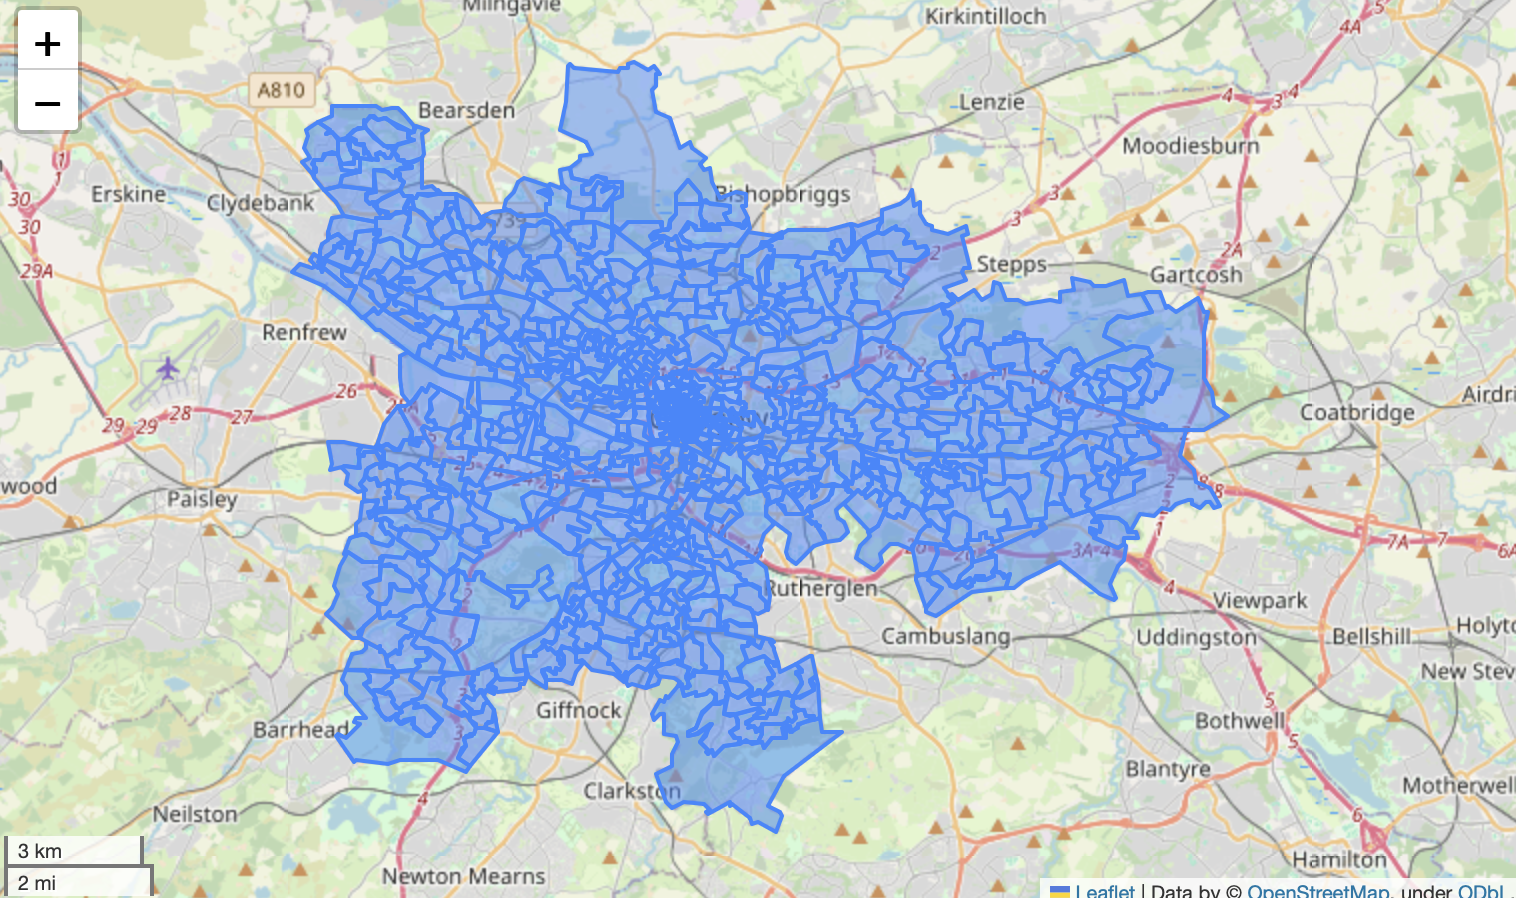

<Axes: >

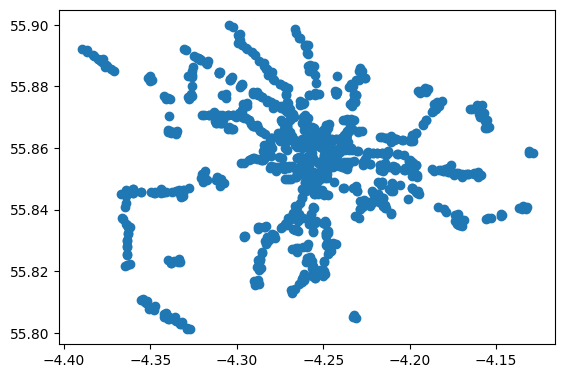

In [13]:
# Perform the spatial join
glasgow_sjoin = gpd.sjoin(sensors_from, workingzones1, how='inner') 

# Plot it
glasgow_sjoin.plot()

In [14]:
# Group sensors by working zones and calculate number of sensors per working zones
grouped_sensors = glasgow_sjoin.groupby('WZCD').size().reset_index(name='Num_Sensors')
print(grouped_sensors)

          WZCD  Num_Sensors
0    S34000363            1
1    S34000365            1
2    S34000367            5
3    S34000368            2
4    S34000370            5
..         ...          ...
335  S34005364            7
336  S34005369           15
337  S34005370            1
338  S34005371            4
339  S34005372            1

[340 rows x 2 columns]


In [15]:
# Merge with the working zones data to visualise result
workingzones_glasgow_sensors = workingzones_glasgow[['WZCD','geometry']].merge(grouped_sensors, on='WZCD', how='left')

# Convert NA values into zeros
workingzones_glasgow_sensors['Num_Sensors'] = workingzones_glasgow_sensors['Num_Sensors'].fillna(0)

In [ ]:
# Map it
workingzones_glasgow_sensors.explore(column='Num_Sensors',cmap='Blues')

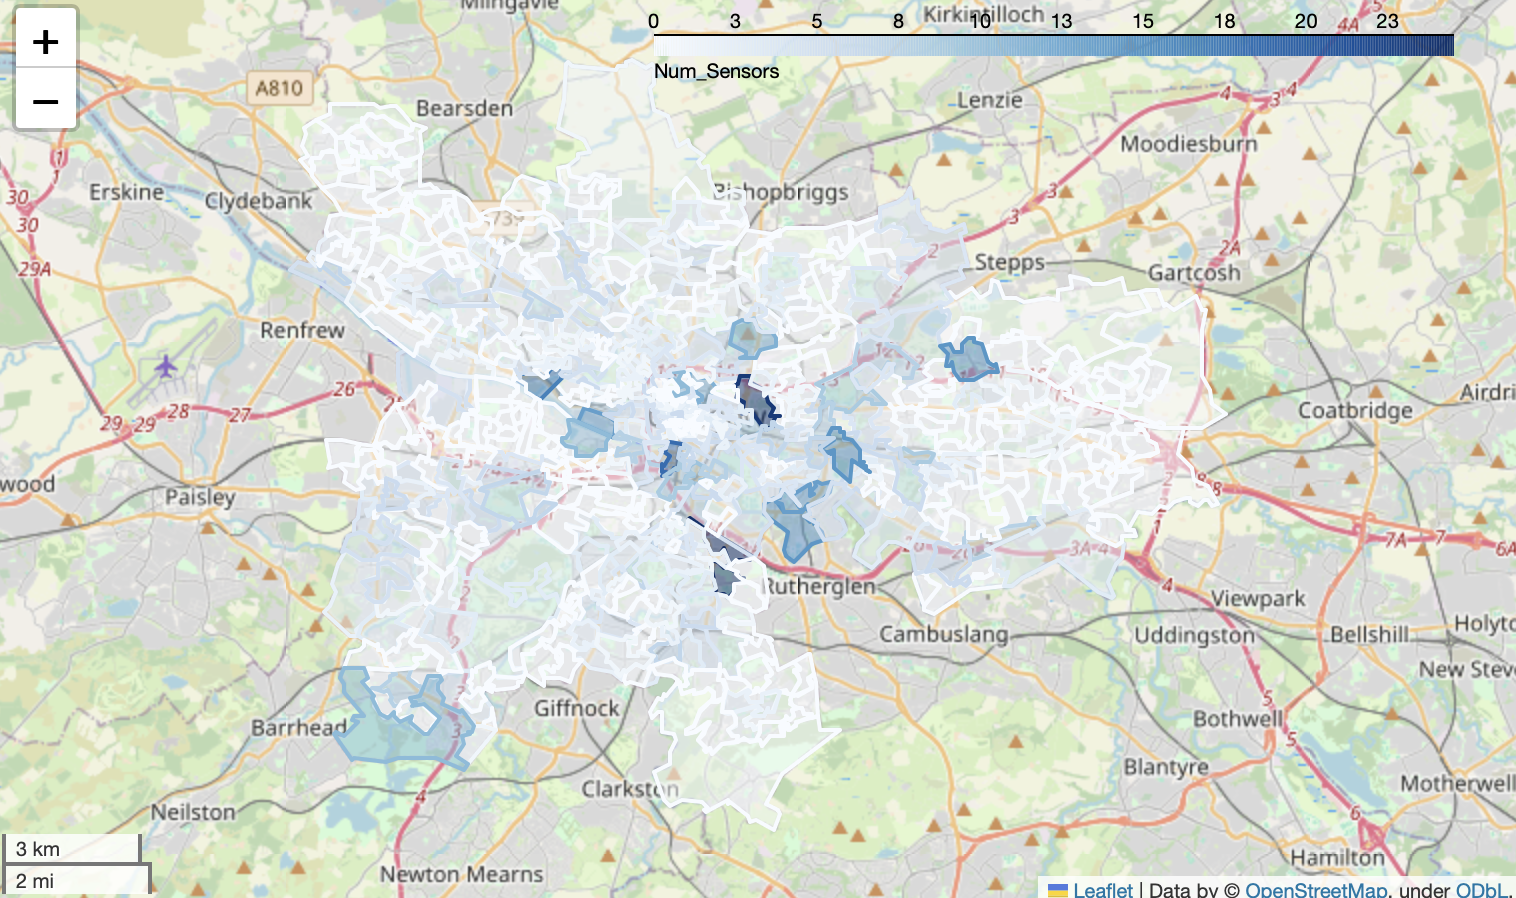

Text(0.5, 1.0, 'Number of Sensors in Glasgow Working Zones')

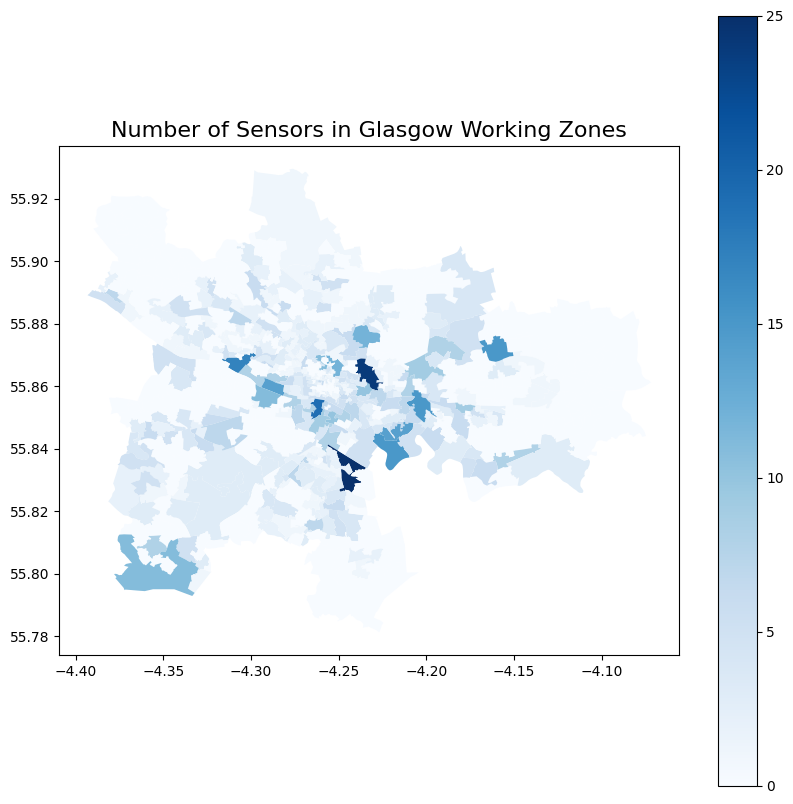

In [17]:
#Create a simple map of what is shown above with a legend and title. 
glasgowsensormap = workingzones_glasgow_sensors.plot(column='Num_Sensors', cmap='Blues', figsize=(10, 10), legend=True, facecolor='black')
glasgowsensormap.set_title('Number of Sensors in Glasgow Working Zones', fontsize=16, color='black')
